In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#### In the previous section, I forgot to chechk if there are any duplicate reviews or not. Let's do it:

In [3]:
df.drop_duplicates().shape

(49582, 2)

In [4]:
df.shape

(50000, 2)

#### It seems we have duplicate reviews. It's very unlikely that two different person, submit the same review, so we need to check some of duplicates to make sure and drop them

In [5]:
temp_df = df[df.duplicated(keep=False)]
temp_df = temp_df.groupby(list(temp_df)).apply(lambda x: tuple(x.index)).tolist()
temp_df[0]

(34058, 47467)

In [6]:
print(df.review[34058])
print('-------')
print(df.review[47467])

"Go Fish" garnered Rose Troche rightly or wrongly the reputation of a film maker with much promise.<br /><br />Its then hard to understand how she could turn out a movie made up of stereotypes that one associates with inferior sitcoms. The entire film rings hollow. I cringed the whole way through.<br /><br />Its supposed to be a look into nineties human sexuality. Well not much more here to be learned than from "In and Out". By now most of us actually do know, that there are men who are sexually attracted to women and there men who are sexually attracted to men and there are even men sexually attracted to both sexes. <br /><br />Seldom has this revelation been portrayed on the screen with so little wit and style.<br /><br />Pathetic.
-------
"Go Fish" garnered Rose Troche rightly or wrongly the reputation of a film maker with much promise.<br /><br />Its then hard to understand how she could turn out a movie made up of stereotypes that one associates with inferior sitcoms. The entire f

#### They are completely the same. So we can drop all duplicate reviews

In [7]:
df = df.drop_duplicates()
df.shape

(49582, 2)

## This time I'll remove stopwords and HTML expressions. Also, we need to stem all words.

In [8]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

In [9]:
stopwords = set(stopwords.words("english"))
ps = PorterStemmer()

In [10]:
def preprocess(review):
    review = BeautifulSoup(review).get_text()
    review = review.lower()
    
    review = " ".join(ps.stem(word) for word in review.split() if word not in stopwords)
    
    return review

In [11]:
print(df.review[10])
print('------')
print(f'Clean review is: {preprocess(df.review[10])}')

Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines.<br /><br />At first it was very odd and pretty funny but as the movie progressed I didn't find the jokes or oddness funny anymore.<br /><br />Its a low budget film (thats never a problem in itself), there were some pretty interesting characters, but eventually I just lost interest.<br /><br />I imagine this film would appeal to a stoner who is currently partaking.<br /><br />For something similar but better try "Brother from another planet"
------
Clean review is: phil alien one quirki film humour base around odd everyth rather actual punchlines.at first odd pretti funni movi progress find joke odd funni anymore.it low budget film (that never problem itself), pretti interest characters, eventu lost interest.i imagin film would appeal stoner current partaking.for someth similar better tri "brother anoth planet"


In [12]:
df['review'] = df['review'].apply(lambda review : preprocess(review))
df.head()

/Users/hogwartz/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


,review,sentiment
0,one review mention watch 1 oz episod hooked. r...,positive
1,wonder littl production. film techniqu unassum...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there' famili littl boy (jake) think the...,negative
4,"petter mattei' ""love time money"" visual stun f...",positive


### Let's see term frequencies:

In [13]:
# split df based on sentiment value
df_pos = df.loc[df['sentiment'] == 'positive']
df_neg = df.loc[df['sentiment'] == 'negative']
pos = ' '.join(df_pos.review).split()
neg = ' '.join(df_neg.review).split()

In [14]:
from collections import Counter

In [15]:
Counter(pos).most_common(50)

[('film', 35497),
 ('movi', 31339),
 ('one', 23855),
 ('like', 19003),
 ('see', 13519),
 ('make', 12851),
 ('get', 12162),
 ('good', 11920),
 ('great', 11181),
 ('watch', 10880),
 ('love', 10519),
 ('stori', 10421),
 ('realli', 10300),
 ('would', 10244),
 ('time', 10204),
 ('charact', 10203),
 ('also', 9671),
 ('even', 9240),
 ('-', 9193),
 ('play', 8848),
 ('show', 8828),
 ('much', 8233),
 ('first', 8110),
 ('well', 7754),
 ('think', 7708),
 ('scene', 7479),
 ('go', 7463),
 ('best', 7390),
 ('look', 7348),
 ('mani', 7339),
 ('peopl', 7160),
 ('take', 6517),
 ('two', 6495),
 ('know', 6376),
 ('way', 6302),
 ('made', 6181),
 ('come', 6177),
 ('never', 6154),
 ('end', 6128),
 ('littl', 6108),
 ('could', 5982),
 ('seem', 5923),
 ('still', 5826),
 ('find', 5803),
 ('give', 5700),
 ('want', 5694),
 ('work', 5665),
 ('thing', 5599),
 ('seen', 5563),
 ('it.', 5470)]

In [16]:
pos_term_freq = pd.DataFrame(Counter(pos).most_common(50), columns=['term', 'count'])
neg_term_freq = pd.DataFrame(Counter(neg).most_common(50), columns=['term', 'count'])

In [17]:
import matplotlib.pyplot as plt

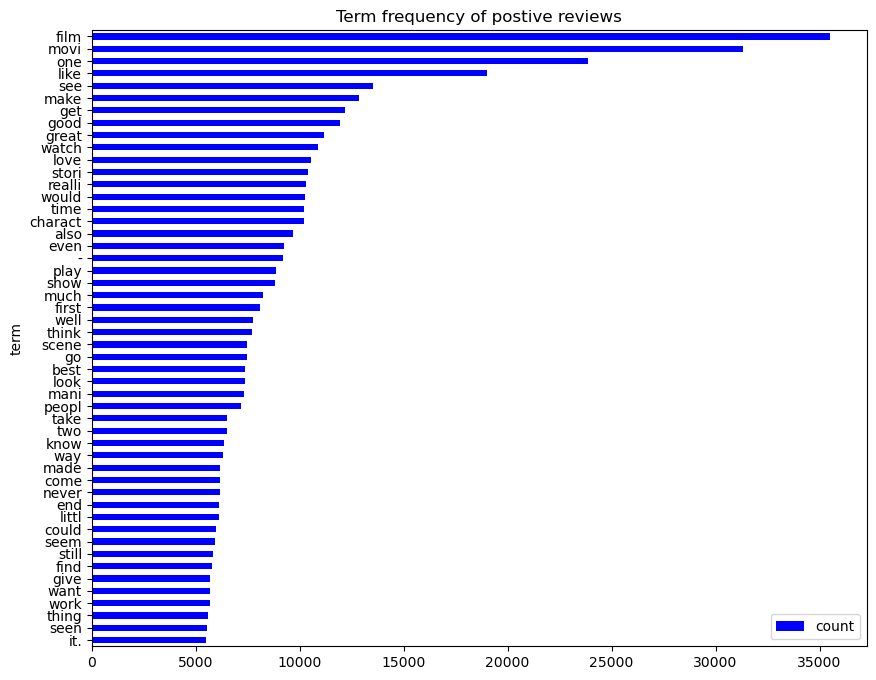

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
pos_term_freq.sort_values(by='count').plot.barh(x='term', y='count', ax=ax, color='blue')
ax.set_title('Term frequency of postive reviews')
plt.show()

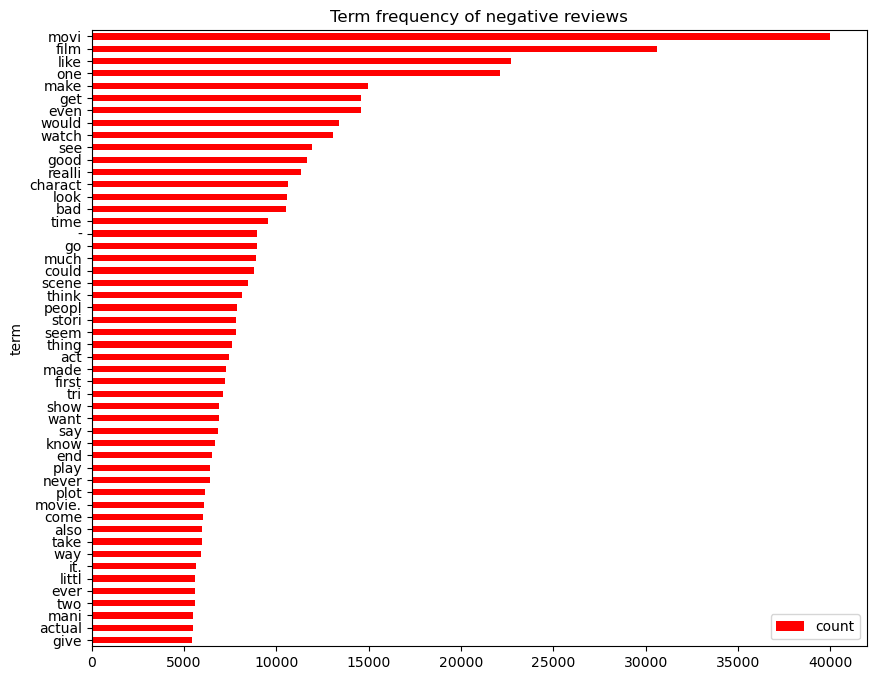

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
neg_term_freq.sort_values(by='count').plot.barh(x='term', y='count', ax = ax, color='red')
ax.set_title('Term frequency of negative reviews')
plt.show()

#### As you can see, some words appeared in both negative and positive reviews, so I'll remove these common words as they won't help us.

In [20]:
common_words = set(pos_term_freq.term) & set(neg_term_freq.term)
common_words

{'-',
 'also',
 'charact',
 'come',
 'could',
 'end',
 'even',
 'film',
 'first',
 'get',
 'give',
 'go',
 'good',
 'it.',
 'know',
 'like',
 'littl',
 'look',
 'made',
 'make',
 'mani',
 'movi',
 'much',
 'never',
 'one',
 'peopl',
 'play',
 'realli',
 'scene',
 'see',
 'seem',
 'show',
 'stori',
 'take',
 'thing',
 'think',
 'time',
 'two',
 'want',
 'watch',
 'way',
 'would'}

In [21]:
def remove_common(review):
    return " ".join(word for word in review.split() if word not in common_words)
df['review'] = df['review'].apply(lambda review: remove_common(review))
df.head()

,review,sentiment
0,"review mention 1 oz episod hooked. right, exac...",positive
1,wonder production. techniqu unassuming- old-ti...,positive
2,"thought wonder spend hot summer weekend, sit a...",positive
3,basic there' famili boy (jake) there' zombi cl...,negative
4,"petter mattei' ""love money"" visual stun watch....",positive


In [24]:
# total number of words in dataset
total_words = df['review'].apply(lambda x: len(x.split(' '))).sum()
# number of unique words
unique_words = len(set(' '.join(df.review).split()))
print(f'Total number of words is: {total_words}')
print(f'The number of unique words: {unique_words}')

Total number of words is: 5249433
The number of unique words: 390569


In [26]:
from sklearn.model_selection import train_test_split

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import  accuracy_score
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.model_selection import  GridSearchCV

In [27]:
X = df.review
y = df.sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import  GridSearchCV

#### Let's go ahead with just 5000 terms to keep model working

In [29]:
nb = Pipeline([
    ('vect', TfidfVectorizer(max_features=5000)),
    ('clf', MultinomialNB())
])
nb.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer(max_features=5000)),
                ('clf', MultinomialNB())])

In [30]:
logr = Pipeline([
    ('vect', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression())
])
logr.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer(max_features=5000)),
                ('clf', LogisticRegression())])

In [31]:
param={'clf__alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}
gs_nb=GridSearchCV(nb,param,scoring='accuracy',cv=10)
gs_nb.fit(X_train, y_train)
print('Best score:', gs_nb.best_score_)
print('Best alpha:', gs_nb.best_params_)

Best score: 0.853497468588879
Best alpha: {'clf__alpha': 10}


In [34]:
param= {'clf__solver': ['newton-cg', 'lbfgs', 'liblinear'],
        'clf__penalty': ['l1', 'l2'],
        'clf__C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
gs_logr =GridSearchCV(logr,param,scoring='accuracy',cv=10)
gs_logr.fit(X_train, y_train)
print('Best score:', gs_logr.best_score_)
print('Best parameters:', gs_logr.best_params_)

/Users/hogwartz/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hogwartz/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/hogwartz/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hogwartz/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

Best score: 0.8844822724949314
Best parameters: {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'}


In [36]:
from sklearn.metrics import  accuracy_score

In [37]:
print('Training accuracy of Naive Bayes:', round(accuracy_score(y_train, gs_nb.predict(X_train)),3))
print('Test accuracy of Naive Bayes:', round(accuracy_score(y_test, gs_nb.predict(X_test)),3))

#results of LogReg
print('Training accuracy of Logistic Regression:', round(accuracy_score(y_train, gs_logr.predict(X_train)),3))
print('Test accuracy of Logistic Regression:', round(accuracy_score(y_test, gs_logr.predict(X_test)),3))

Training accuracy of Naive Bayes: 0.863
Test accuracy of Naive Bayes: 0.849
Training accuracy of Logistic Regression: 0.91
Test accuracy of Logistic Regression: 0.88


## Ok then! Logistic regression have been choosed, according to a slightly better accuracy on test data.